In [56]:
import os
import sys
import numpy as np
import pandas as pd

In [2]:
c1 = np.loadtxt('c1thresholded.txt')

In [5]:
np.shape(c1.reshape(-1,1))

(400, 1)

In [43]:
#load data
#x=np.empty((400,1))
c=1
x = np.loadtxt('c'+str(c)+'thresholded.txt').reshape(-1,1)
for c in range(2,5):
    comp_data = np.loadtxt('c'+str(c)+'thresholded.txt').reshape(-1,1)
    x = np.concatenate((x,np.round(comp_data)),axis=1)

comp_array = np.round(x).astype(int)
    

In [44]:
comp_array

array([[0, 1, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 1],
       ...,
       [1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [45]:
#add a column that is component # IF only IF it is in one of the thresholded maps only
#if part of no component - give 0
#if part of multiple, give 5 
comp_array[10:20,:]

array([[1, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 0],
       [0, 1, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 1],
       [0, 1, 0, 1],
       [0, 0, 1, 1],
       [1, 0, 0, 1],
       [0, 1, 0, 0]])

In [46]:
for p in range(10,20):
    x = comp_array[p,:]
    if np.sum(x) == 0:
        out = 0
    elif np.sum(x)>1:
        out = 5
    elif np.sum(x)==1:
        out = np.argmax(x) + 1
    print(x, out)

[1 0 0 1] 5
[0 0 0 1] 4
[0 0 0 0] 0
[0 1 0 1] 5
[0 0 0 1] 4
[1 0 0 1] 5
[0 1 0 1] 5
[0 0 1 1] 5
[1 0 0 1] 5
[0 1 0 0] 2


In [49]:
assignment = np.empty(400).reshape(-1,1)
for p in range(0,400):
    x = comp_array[p,:]
    if np.sum(x) == 0:
        assignment[p,0] = 0
    elif np.sum(x)>1:
        assignment[p,0] = 5
    elif np.sum(x)==1:
        assignment[p,0] = np.argmax(x) + 1
comp_array_assignment = np.concatenate((comp_array,assignment),axis=1)
comp_array_assignment[0:20,:]

array([[0., 1., 0., 1., 5.],
       [0., 1., 0., 0., 2.],
       [0., 1., 0., 1., 5.],
       [0., 1., 0., 1., 5.],
       [0., 1., 0., 1., 5.],
       [0., 1., 0., 1., 5.],
       [0., 1., 0., 0., 2.],
       [0., 1., 0., 1., 5.],
       [1., 1., 0., 1., 5.],
       [1., 0., 0., 1., 5.],
       [1., 0., 0., 1., 5.],
       [0., 0., 0., 1., 4.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 5.],
       [0., 0., 0., 1., 4.],
       [1., 0., 0., 1., 5.],
       [0., 1., 0., 1., 5.],
       [0., 0., 1., 1., 5.],
       [1., 0., 0., 1., 5.],
       [0., 1., 0., 0., 2.]])

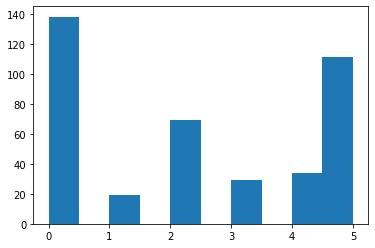

In [51]:
import matplotlib
from matplotlib import pyplot as plt
plt.hist(comp_array_assignment[:,4].flatten())
plt.show()

In [55]:
parcel_ids = np.arange(1,401).reshape(-1,1)
comp_array_assignment_parcelids = np.concatenate((parcel_ids, comp_array_assignment), axis=1)
comp_array_assignment_parcelids.astype(int)

array([[  1,   0,   1,   0,   1,   5],
       [  2,   0,   1,   0,   0,   2],
       [  3,   0,   1,   0,   1,   5],
       ...,
       [398,   1,   0,   0,   0,   1],
       [399,   0,   0,   0,   0,   0],
       [400,   0,   0,   0,   0,   0]])

In [59]:
#write out
pd.DataFrame(comp_array_assignment_parcelids.astype(int)).to_csv("component_assignments.csv",
                                                                index = False,
                                                                header = ["SchaefferID", "inC1","inC2",
                                                                         "inC3","inC4","Assignment"])
                                                                